In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Upload your file
uploaded = files.upload()

# Step 2: Load dataset
data = pd.read_csv('data.csv')

# Step 3: Check missing values
print("Missing values before cleaning:\n", data.isnull().sum())

# Step 4: Fill missing values instead of dropping
# Fill numeric columns with mean
data = data.fillna(data.mean(numeric_only=True))

# Step 5: Encode categorical labels (example: 'diagnosis' column)
if 'diagnosis' in data.columns:
    label_encoder = LabelEncoder()
    data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
else:
    raise KeyError("❌ 'diagnosis' column not found — check your dataset headers!")

# Step 6: Keep only numeric columns (avoid string/object columns)
data = data.select_dtypes(include=[np.number])

# Step 7: Save cleaned dataset
data.to_csv('clean_data.csv', index=False)
print("\n✅ Cleaned dataset saved as 'clean_data.csv'")

# Step 8: Download the cleaned dataset
files.download('clean_data.csv')

# Step 9: Split into features and target
if 'diagnosis' in data.columns:
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']

    # Replace any leftover NaN with column means
    X = np.nan_to_num(X, nan=np.nanmean(X))

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    print("\n✅ Data preprocessing complete!")
    print("Training set shape:", X_train.shape)
    print("Testing set shape:", X_test.shape)


Saving data.csv to data (1).csv
Missing values before cleaning:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symme

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Data preprocessing complete!
Training set shape: (455, 32)
Testing set shape: (114, 32)


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Check for NaN values
print("Before PCA - NaN in X_train:", np.isnan(X_train).sum().sum())
print("Before PCA - NaN in X_test:", np.isnan(X_test).sum().sum())

# Replace any NaN values with column means
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))

# Apply PCA safely
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("✅ PCA completed successfully!")
print("Explained variance ratio:", pca.explained_variance_ratio_)


Before PCA - NaN in X_train: 0
Before PCA - NaN in X_test: 0
✅ PCA completed successfully!
Explained variance ratio: [0.41753477 0.19048496 0.09621647 0.06046169 0.05182103 0.0412018
 0.03313972 0.02184432 0.01540669 0.01311522]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



===== Logistic Regression =====
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


===== Random Forest =====
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


===== SVM =====
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Repor

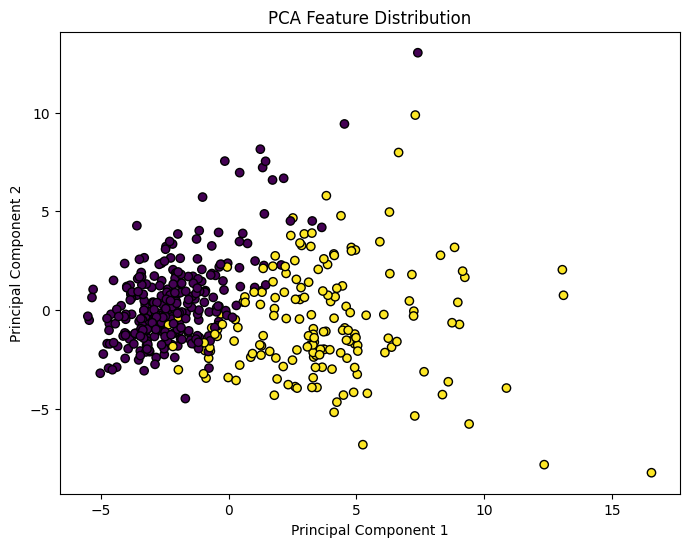

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('PCA Feature Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Saving data.csv to data (5).csv
✅ Dataset Loaded Successfully!
Shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

🔍 Missing values after cleaning:
 0
✅ Any NaN left in X? 0

🚀 Training SVM model...

📊 SVM Results
Accuracy: 0.9649
ROC-AUC: 0.9947
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97    

/tmp/ipython-input-2394178722.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2394178722.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


📊 AdaBoost Results
Accuracy: 0.9649
ROC-AUC: 0.9937
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


🏁 Model Performance Summary:
              Accuracy   ROC_AUC
SVM           0.964912  0.994709
KNN           0.956140  0.982143
DecisionTree  0.912281  0.921627
NaiveBayes    0.921053  0.989418
AdaBoost      0.964912  0.993717


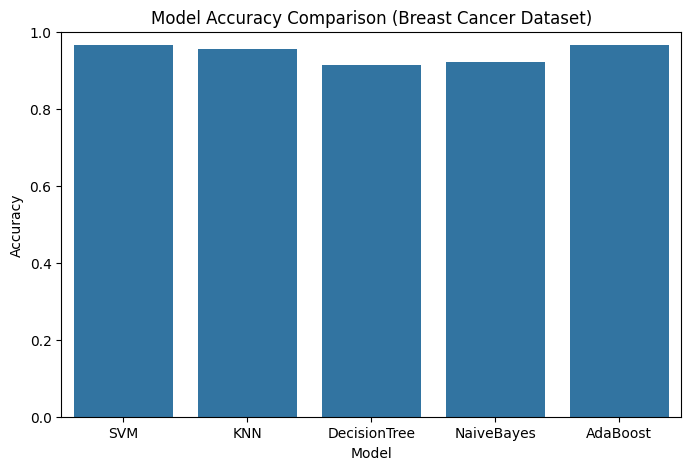

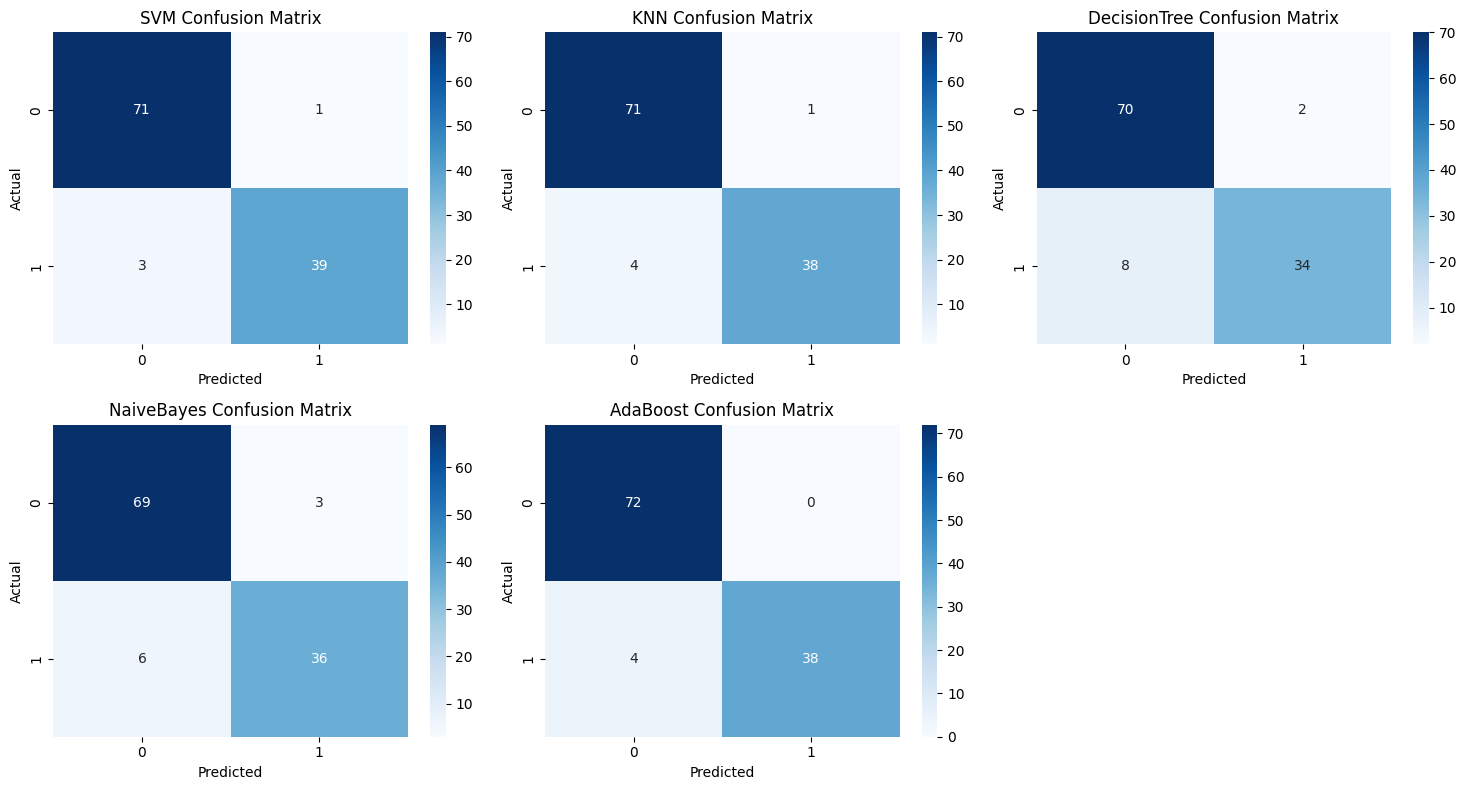

In [ ]:
# ===========================================
# 🎯 MODEL TRAINING AND EVALUATION (BREAST CANCER DATA)
# ===========================================

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

# -------------------------------------------
# ⿡ Load and Preprocess Data
# -------------------------------------------
uploaded = files.upload()
df = pd.read_csv('data.csv')

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# -------------------------------------------
# 🧹 CLEAN DATA COMPLETELY
# -------------------------------------------

# Replace common missing value tokens
df.replace(['?', 'NA', 'na', 'NaN', ' ', '--', 'null'], np.nan, inplace=True)

# Drop columns that are completely empty
df.dropna(axis=1, how='all', inplace=True)

# Fill numeric columns with mean and non-numeric with mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# -------------------------------------------
# 🏷️ Encode Target Column
# -------------------------------------------
if 'diagnosis' in df.columns:
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])
else:
    raise KeyError("❌ 'diagnosis' column not found — check dataset headers!")

# -------------------------------------------
# 🔢 Keep Numeric Columns Only
# -------------------------------------------
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.mean(numeric_only=True))

# Verify again
print("\n🔍 Missing values after cleaning:\n", df.isnull().sum().sum())

# -------------------------------------------
# ⿢ Feature-Target Split
# -------------------------------------------
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Final safety check for NaN
if np.isnan(X).any():
    print("⚠️ NaN detected after scaling — replacing with 0")
    X = np.nan_to_num(X)

# Confirm clean
print("✅ Any NaN left in X?", np.isnan(X).sum())

# -------------------------------------------
# ⿣ Train-Test Split
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------
# ⿤ Define All Models
# -------------------------------------------
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "NaiveBayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
}

# -------------------------------------------
# ⿥ Train, Predict, Evaluate
# -------------------------------------------
results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": acc, "ROC_AUC": roc}

    print(f"\n📊 {name} Results")
    print("Accuracy:", round(acc, 4))
    if roc:
        print("ROC-AUC:", round(roc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# -------------------------------------------
# ⿦ Compare Model Performances
# -------------------------------------------
results_df = pd.DataFrame(results).T
print("\n🏁 Model Performance Summary:")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'])
plt.title("Model Accuracy Comparison (Breast Cancer Dataset)")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

# -------------------------------------------
# ⿧ Confusion Matrix Visualization (Optional)
# -------------------------------------------
plt.figure(figsize=(15, 8))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 3, i + 1)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()
